HE11_General

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from scipy import special,linalg
import cmath
import math

In [2]:
global n1,n2nc0,eps0,mu0,a,m,w,k0

n1 = 1.5
n2 = 1.0
c0 = 3e8
eps0 = 8.854187e-12
mu0 = 1.256637e-6
a = 5e-6
m = 1

In [3]:
def tot_power(A,B,C,D,beta,p,q,jj):
    global n1,n2,c0,eps0,mu0,a,m,w,k0
    res_r = 800
    r = np.array([np.linspace(0.01*a,80*a,res_r)])
    dr = (r[0][len(r[0]) - 1]-r[0][0])/(res_r+1)
    power = 0
    for j in range(0,res_r):
        J1 = sp.special.jv(m, r[0][j]*p)
        K1 = sp.special.kv(m, r[0][j]*q)
        dJ1 = 0.5*(sp.special.jv(m-1,r[0][j]*p) - sp.special.jv(m+1,r[0][j]*p))
        dK1 = -0.5*(sp.special.kv(m-1,r[0][j]*q) + sp.special.kv(m+1,r[0][j]*q))
        point_r = r[0][j]
        point_phi = 0
        point_z = 0
        
        EH_array = field_calc(A,B,C,D,beta,p,q,J1,dJ1,K1,dK1,point_r,point_phi,point_z)
        
        E_r = EH_array[0]
        E_phi = EH_array[1]
        E_z = EH_array[2]
        H_r = EH_array[3]
        H_phi = EH_array[4]
        H_z = EH_array[5]
        
        power = power + 2*np.pi*r[0][j]*dr*(1/2)*(E_r*np.conj(H_phi)-E_phi*np.conj(H_r))
        
    return power

In [4]:
def field_calc( A, B, C, D, beta, p, q, J1, dJ1, K1, dK1, point_r,point_phi,point_z ):
    global n1,n2,c0,eps0,mu0,a,m,w,k0

    E_r =  A*1j*beta/p[0][0]*dJ1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z) - B[0][0]*mu0*w[0][0]*m/p[0][0]**2/point_r*J1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z)
    
    E_phi=  -A*beta*m/p**2/point_r*J1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z) - B*1j*mu0*w/p*dJ1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z)

    E_z=    A*J1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z);

    H_r=    A*eps0*n1**2*w*m/p**2/point_r*J1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z) + B*1j*beta/p*dJ1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z)

    H_phi=  A*1j*eps0*n1**2*w/p*dJ1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z) - B*beta*m/p**2/point_r*J1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z)

    H_z=    B*J1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z)
    
    if(type(point_r) == int):
        if(point_r > a):
            E_r = -C*1j*beta/q*dK1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z) + D*mu0*w*m/q**2/point_r*K1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z)
            E_phi = C*beta*m/q**2/point_r*K1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z) + D*1j*mu0*w/q*dK1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z)
            E_z= C*K1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z)
            H_r = -C*eps0*n2**2*w*m/q**2/point_r*K1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z) - D*1j*beta/q*dK1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z)
            H_phi = -C*1j*eps0*n2**2*w/q*dK1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z) + D*beta*m/q**2/point_r*K1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z)
            H_z = D*K1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z)
        else:
            E_r = E_r
            E_phi = E_phi
            E_z = E_z
            H_r = H_r
            H_phi = H_phi
            H_z = H_z
            
    else:
        dummy = (point_r > a).astype(int)
        dummy_inv = (point_r < a).astype(int)
        dummy = dummy*(-C*1j*beta/q*dK1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z) + D*mu0*w*m/q**2/point_r*K1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z))
        dummy_inv = E_r * dummy_inv
        E_r = dummy + dummy_inv
        
        dummy = (point_r > a).astype(int)
        dummy_inv = (point_r < a).astype(int)
        dummy = dummy*(C*beta*m/q**2/point_r*K1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z) + D*1j*mu0*w/q*dK1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z))
        dummy_inv = E_phi * dummy_inv
        E_phi = dummy + dummy_inv
        
        dummy = (point_r > a).astype(int)
        dummy_inv = (point_r < a).astype(int)
        dummy = dummy*(C*K1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z))
        dummy_inv = E_z * dummy_inv
        E_z = dummy + dummy_inv
        
        dummy = (point_r > a).astype(int)
        dummy_inv = (point_r < a).astype(int)
        dummy = dummy*(-C*eps0*n2**2*w*m/q**2/point_r*K1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z) - D*1j*beta/q*dK1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z))
        dummy_inv = H_r * dummy_inv
        H_r = dummy + dummy_inv
        
        dummy = (point_r > a).astype(int)
        dummy_inv = (point_r < a).astype(int)
        dummy = dummy*(-C*1j*eps0*n2**2*w/q*dK1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z) + D*beta*m/q**2/point_r*K1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z))
        dummy_inv = H_phi * dummy_inv
        H_phi = dummy + dummy_inv
        
        
        dummy = (point_r > a).astype(int)
        dummy_inv = (point_r < a).astype(int)
        dummy = dummy*(D*K1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z))
        dummy_inv = H_z * dummy_inv
        H_z = dummy + dummy_inv
        
        
        
    return [E_r,E_phi,E_z,H_r,H_phi,H_z,point_r,point_phi,point_z]

In [5]:
alpha_ee = 1*(10e-9)**3
alpha_em = 0.01*(10e-9)**3
alpha_mm = 0.1*(10e-9)**3

res_r = 1
res_w = 1
res_beta = 20000

In [6]:
if res_w == 1:
    mat_w = np.array([np.linspace(0.05e15, 0.1e15, 2)])
    mat_w = np.array([[mat_w[0][1]]])
else:
    mat_w = np.array([np.linspace(0.05e15, 0.1e15, res_w)])

In [7]:
mat_k0 = mat_w/c0

F1 = np.zeros((3,mat_w.shape[1]),dtype = complex)
F2 = np.zeros((3,mat_w.shape[1]),dtype = complex)
F3 = np.zeros((3,mat_w.shape[1]),dtype = complex)
F4 = np.zeros((3,mat_w.shape[1]),dtype = complex)
F5 = np.zeros((3,mat_w.shape[1]),dtype = complex)
F6 = np.zeros((3,mat_w.shape[1]),dtype = complex)
F7 = np.zeros((3,mat_w.shape[1]),dtype = complex)
F8 = np.zeros((3,mat_w.shape[1]),dtype = complex)
F_tot = np.zeros((3,mat_w.shape[1]), dtype= complex)

In [8]:
for jj in range(0,mat_w.shape[1]):
    w = np.array([mat_w[jj]])
    lambda_matrix = np.array([2*np.pi*c0*w])
    k0 = w/c0
    mat_V = k0*a*(n1**2 - n2**2)**0.5
    
    beta = np.array([np.linspace(n2*k0[0][0]*1.0000001 , n1*k0[0][0]*0.999999, res_beta)])
    p = (n1**2*k0**2 -beta**2)**0.5
    q = (beta**2 - n2**2*k0**2)**0.5
    J1 = sp.special.jv(m,a*p)
    K1 = sp.special.kv(m,a*q)
    dJ1 = 0.5*(sp.special.jv(m-1,a*p) - sp.special.jv(m+1,a*p))
    dK1 = -0.5*(sp.special.kv(m-1,a*q) + sp.special.kv(m+1,a*q))
    
    error = (dJ1/p/J1 + dK1/q/K1)*(dJ1/p/J1 + n2**2/n1**2*dK1/q/K1) - m**2/a**2*(1/p**2 + 1/q**2)*(1/p**2 + n2**2/n1**2/q**2)
    
    error_min = np.amin(abs(error))
    error_min_index = np.where(abs(error) == error_min)
    out_beta = beta[(error_min_index[0][0])][(error_min_index[1][0])]
    
    beta = 0
    p = 0
    q = 0
    J1 = 0
    K1 = 0
    dJ1 = 0
    dK1 = 0
    
        
    beta = out_beta
    beta_normal = out_beta
    mat_b = (beta/k0 - n2)/(n1-n2)
    w = mat_w
    p = (n1**2*k0**2 -beta**2)**0.5
    q = (beta**2 - n2**2*k0**2)**0.5
    J1 = sp.special.jv(m,a*p)
    K1 = sp.special.kv(m,a*q)
    dJ1 = 0.5*(sp.special.jv(m-1,a*p) - sp.special.jv(m+1,a*p))
    dK1 = -0.5*(sp.special.kv(m-1,a*q) + sp.special.kv(m+1,a*q))
    
    A = 1
    B = -A*J1*beta*m*(1/p**2 + 1/q**2)/a/1j/w/mu0/(J1/K1*dK1/q+dJ1/p)
    C = A*J1/K1
    D = B*J1/K1
    
    mat_B = B
    mat_c = C
    mat_D = D
    
    power = tot_power( A, B, C, D, beta, p, q, jj );
    
    J1 = 0
    K1 = 0
    dJ1 = 0
    dK1 = 0
    
    r = 1.0*a+50e-9
    
    A = A/np.sqrt(power)
    B = B/np.sqrt(power)
    C = C/np.sqrt(power)
    D = D/np.sqrt(power)
    
    K1 = sp.special.kn(m,r*q)
    dK1 = -0.5*(sp.special.kn(m-1, r*q) + sp.special.kn(m+1,r*q))
    ddK1 = 0.25*(sp.special.kn(m-2,r*q) + 2*sp.special.kn(m,r*q) + sp.special.kn(m+2 ,r*q))
    
    F1[0][jj] = 1/4*(alpha_ee.real*( 2*abs(C)**2*q*K1*dK1+2*(abs(C)**2*beta**2/q+abs(D)**2*mu0**2*w**2/q)*dK1*ddK1+2*(abs(D)**2*mu0**2*w**2*m**2/q**4+abs(C)**2*beta**2*m**2/q**4)*(-K1**2/r**3+q*K1*dK1/r**2)+(-2*C*np.conj(D)+2*np.conj(C)*D)*1j*beta*mu0*w*m/q**3*(-K1*dK1/r**2+q*dK1**2/r+q*K1*ddK1/r))\
                + alpha_mm.real*( 2*abs(D)**2*q*K1*dK1+2*(abs(D)**2*beta**2/q+abs(C)**2*eps0**2*n2**4*w**2/q)*dK1*ddK1+2*(abs(C)**2*eps0**2*n2**4*w**2*m**2/q**4+abs(D)**2*beta**2*m**2/q**4)*(-K1**2/r**3+q*K1*dK1/r**2)+(-2*C*np.conj(D)+2*np.conj(C)*D)*1j*beta*eps0*n2**2*w*m/q**3*(-K1*dK1/r**2+q*dK1**2/r+q*K1*ddK1/r))\
                - 2*alpha_em.real*((-2*abs(C)**2*eps0*n2**2-2*abs(D)**2*mu0)*1j*beta*w*m/q**3*(-K1*dK1/r**2+q*dK1**2/r+q*K1*ddK1/r)+2*(np.conj(C)*D*beta**2/q**2-C*np.conj(D)*mu0*w**2*eps0*n2**2/q**2)*q*dK1*ddK1+2*(-C*np.conj(D)*mu0*w**2*eps0*n2**2*m**2/q**4+np.conj(C)*D*beta**2*m**2/q**4)*(-K1**2/r**3+q*K1*dK1/r**2)+2*np.conj(C)*D*q*K1*dK1).imag)
    F1[1][jj] = 0
    F1[2][jj] = 0
    
    F2[0][jj] = 0
    F2[1][jj] = (k0/eps0*(alpha_ee).imag+k0/mu0*(alpha_mm).imag-c0**2*k0**4/6/np.pi*((alpha_ee*np.conj(alpha_mm)).real+abs(alpha_em)**2))/c0*0.5*((-abs(C)**2*eps0*n2**2*w*m/q**2/r-abs(D)**2*mu0*w*m/q**2/r)*K1**2+2*C*np.conj(D)*1j*beta/q*K1*dK1)
    F2[2][jj] = (k0/eps0*(alpha_ee).imag+k0/mu0*(alpha_mm).imag-c0**2*k0**4/6/np.pi*((alpha_ee*np.conj(alpha_mm)).real+abs(alpha_em)**2))/c0*0.5*((abs(C)**2*eps0*n2**2+abs(D)**2*mu0)*beta*w/q**2*(dK1**2+m**2*K1**2/q**2/r**2)+2*(-C*np.conj(D)*beta**2+D*np.conj(C)*mu0*eps0*n2**2*w**2)*1j*m/q**3/r*K1*dK1)
    
    F3[0][jj] = 0
    F3[1][jj] = -(alpha_em).imag*(-1/2)*( 2*(abs(C)**2*eps0*n2**2+abs(D)**2*mu0)*beta*w/q**2*(q*dK1*ddK1+m**2/q/r**2*K1*dK1-m**2*K1**2/q**2/r**3)+2*(-C*np.conj(D)*beta**2+D*np.conj(C)*mu0*eps0*n2**2*w**2)*1j*m/q**3*(q*dK1**2/r+q*K1*ddK1/r-K1*dK1/r**2) )
    F3[2][jj] = -(alpha_em).imag/r*( -(abs(C)**2*eps0*n2**2+abs(D)**2*mu0)*w*m/q*K1*dK1+C*np.conj(D)*1j*beta*(1/q*K1*dK1+r*dK1**2+r*K1*ddK1) )
    
    F4[0][jj] = 0 
    F4[1][jj] = c0*k0/eps0*(alpha_ee).imag*(-eps0)/2/w/1j*( (-abs(C)**2*beta**2-abs(D)**2*mu0**2*w**2)*1j*m/q**3*(q*dK1**2/r+q*K1*ddK1/r-K1*dK1/r**2)-2*C*np.conj(D)*beta*mu0*w/q*dK1*ddK1+2*D*np.conj(C)*mu0*beta*w*m**2/q**4*(q*K1*dK1/r**2-K1**2/r**3) )
    F4[2][jj] = c0*k0/eps0*(alpha_ee).imag*eps0/2/w/1j/r*( abs(C)**2*1j*beta/q*(q*r*dK1**2+q*r*K1*ddK1+K1*dK1)+2*C*np.conj(D)*mu0*w*m/q*K1*dK1 )
    
    F5[0][jj] = 0
    F5[1][jj] = c0*k0/mu0*(alpha_mm).imag*(-mu0)/2/w/1j*( (-abs(C)**2*eps0**2*n2**4*w**2-abs(D)**2*beta**2)*1j*m/q**3*(q*dK1**2/r+q*K1*ddK1/r-K1*dK1/r**2)-2*C*np.conj(D)*eps0*n2**2*w*beta*m**2/q**4*(q*K1*dK1/r**2-K1**2/r**3)+2*D*np.conj(C)*eps0*n2**2*beta*w/q*K1*dK1 )
    F5[2][jj] = c0*k0/mu0*(alpha_mm).imag*mu0/2/w/1j/r*( abs(D)**2*1j*beta/q*(q*r*dK1**2+q*r*K1*ddK1+K1*dK1)-2*D*np.conj(C)*eps0*n2**2*w*m/q*K1*dK1 )
    
    F6[0][jj] = 0
    F6[1][jj] = w*(-2*w*(alpha_em).imag+c0*k0**4/3/np.pi/eps0*(alpha_ee*np.conj(alpha_em)).real)*eps0/2/w/1j*(abs(C)**2*1j*beta/q*K1*dK1+C*np.conj(D)*mu0*w*m/q**2/r*K1**2)
    F6[2][jj] = w*(-2*w*(alpha_em).imag+c0*k0**4/3/np.pi/eps0*(alpha_ee*np.conj(alpha_em)).real)*eps0/2/w/1j*( (-abs(C)**2*beta**2-abs(D)**2*mu0**2*w**2)*1j*m/q**3/r*K1*dK1-C*np.conj(D)*beta*mu0*w/q**2*dK1**2+D*np.conj(C)*beta*mu0*w*m**2/q**4/r**2*K1**2 )
    
    F7[0][jj] = 0
    F7[1][jj] = w*(-2*w*(alpha_em).imag+c0*k0**4/3/np.pi/mu0*(alpha_mm*np.conj(alpha_em)).real)*mu0/2/w/1j*(-D*np.conj(C)*eps0*n2**2*w*m/q**2/r*K1**2+abs(D)**2*1j*beta/q*K1*dK1)
    F7[2][jj] = w*(-2*w*(alpha_em).imag+c0*k0**4/3/np.pi/mu0*(alpha_mm*np.conj(alpha_em)).real)*mu0/2/w/1j*((-abs(C)**2*eps0**2*n2**4*w**2-abs(D)**2*beta**2)*1j*m/q**3/r*K1*dK1-C*np.conj(D)*eps0*n2**2*w*beta*m**2/q**4/r**2*K1**2+D*np.conj(C)*beta*eps0*n2**2*w/q**2*dK1**2 )
    
    F8[0][jj] = c0*k0**4/12/np.pi*(alpha_ee*np.conj(alpha_mm)).imag*(abs(D)**2*mu0-abs(C)**2*eps0*n2**2)*w/q*K1*dK1;
    F8[1][jj] = 0
    F8[2][jj] = 0
    
    F_tot[0][jj] = F1[0, jj]+F2[0, jj]+F3[0, jj]+F4[0, jj]+F5[0, jj]+F6[0, jj]+F7[0, jj]+F8[0, jj]
    F_tot[1][jj] = F1[1, jj]+F2[1, jj]+F3[1, jj]+F4[1, jj]+F5[1, jj]+F6[1, jj]+F7[1, jj]+F8[1, jj]
    F_tot[2][jj] = F1[2, jj]+F2[2, jj]+F3[2, jj]+F4[2, jj]+F5[2, jj]+F6[2, jj]+F7[2, jj]+F8[2, jj]

In [9]:
res_long_z = 20
res_long_x = 20
res_trns_x = 20
res_trns_y = 20

In [10]:
x_long = np.linspace(-2*a, 2*a, res_long_x)
z_long = np.linspace(0*a, 4*a, res_long_z)
x_trns = np.linspace(-2*a, 2*a, res_trns_x)
y_trns = np.linspace(-2*a, 2*a, res_trns_y)

In [11]:
mat_long_z,mat_long_x = np.meshgrid(z_long, x_long)
mat_trns_x,mat_trns_y = np.meshgrid(x_trns, y_trns)

In [12]:
point_r = abs(mat_long_x);
point_phi = np.arctan2(0, mat_long_x);
point_z = mat_long_z;

In [13]:
J1 = sp.special.jv(m, point_r*p)
K1 = sp.special.kn(m, point_r*q)
dJ1 = 0.5*(sp.special.jv(m-1, point_r*p)- sp.special.jv(m+1, point_r*p))
dK1 = -0.5*(sp.special.kn(m-1, point_r*q)+sp.special.kn(m+1, point_r*q))

In [14]:
EH_array = field_calc(A,B,C,D,beta,p,q,J1,dJ1,K1,dK1,point_r,point_phi,point_z)

In [15]:
E_long_r = EH_array[0]
E_long_phi = EH_array[1]
E_long_z = EH_array[2]
H_long_r = EH_array[3]
H_long_phi = EH_array[4]
H_long_z = EH_array[5]

In [16]:
E_long_x=    E_long_r*np.cos(point_phi)-E_long_phi*np.sin(point_phi)
E_long_y=    E_long_r*np.sin(point_phi)+E_long_phi*np.cos(point_phi)
H_long_x=    H_long_r*np.cos(point_phi)-H_long_phi*np.sin(point_phi)
H_long_y=    H_long_r*np.sin(point_phi)+H_long_phi*np.cos(point_phi)

In [17]:
Le_long_x=   eps0/4/w/1j*(E_long_y*np.conj(E_long_z)-E_long_z*np.conj(E_long_y))
Le_long_y=   eps0/4/w/1j*(E_long_z*np.conj(E_long_x)-E_long_x*np.conj(E_long_z))
Le_long_z=   eps0/4/w/1j*(E_long_x*np.conj(E_long_y)-E_long_y*np.conj(E_long_x))

In [18]:
Lm_long_x =   mu0/4/w/1j*(H_long_y*np.conj(H_long_z)-H_long_z*np.conj(H_long_y))
Lm_long_y =   mu0/4/w/1j*(H_long_z*np.conj(H_long_x)-H_long_x*np.conj(H_long_z))
Lm_long_z =   mu0/4/w/1j*(H_long_x*np.conj(H_long_y)-H_long_y*np.conj(H_long_x))

In [19]:
L_long_x=   Le_long_x+Lm_long_x
L_long_y=   Le_long_y+Lm_long_y
L_long_z=   Le_long_z+Lm_long_z

In [20]:
S_long_x=   1/2*(E_long_y*np.conj(H_long_z)-E_long_z*np.conj(H_long_y))
S_long_y=   1/2*(E_long_z*np.conj(H_long_x)-E_long_x*np.conj(H_long_z))
S_long_z=   1/2*(E_long_x*np.conj(H_long_y)-E_long_y*np.conj(H_long_x))

In [21]:
point_r=    abs((mat_trns_x**2+mat_trns_y**2)**0.5)
point_phi=  np.arctan2(mat_trns_y, mat_trns_x)
point_z=    np.zeros((mat_trns_x.shape),dtype = complex)

In [22]:
J1 = sp.special.jv(m, point_r*p)
K1 = sp.special.kn(m, point_r*q)
dJ1 = 0.5*(sp.special.jv(m-1, point_r*p)- sp.special.jv(m+1, point_r*p))
dK1 = -0.5*(sp.special.kn(m-1, point_r*q)+sp.special.kn(m+1, point_r*q))

In [23]:
EH_array = field_calc(A,B,C,D,beta,p,q,J1,dJ1,K1,dK1,point_r,point_phi,point_z)

In [24]:
E_trns_r = EH_array[0]
E_trns_phi =EH_array[1]
E_trns_z = EH_array[2]
H_trns_r =EH_array[3]
H_trns_phi =EH_array[4]
H_trns_z =EH_array[5]

In [25]:
E_trns_x=    E_trns_r*np.cos(point_phi)-E_trns_phi*np.sin(point_phi)
E_trns_y=    E_trns_r*np.sin(point_phi)+E_trns_phi*np.cos(point_phi)
H_trns_x=    H_trns_r*np.cos(point_phi)-H_trns_phi*np.sin(point_phi)
H_trns_y=    H_trns_r*np.sin(point_phi)+H_trns_phi*np.cos(point_phi)

In [26]:
Le_trns_x=   eps0/4/w/1j*(E_trns_y*np.conj(E_trns_z)-E_trns_z*np.conj(E_trns_y))
Le_trns_y=   eps0/4/w/1j*(E_trns_z*np.conj(E_trns_x)-E_trns_x*np.conj(E_trns_z))
Le_trns_z=   eps0/4/w/1j*(E_trns_x*np.conj(E_trns_y)-E_trns_y*np.conj(E_trns_x))

In [27]:
Lm_trns_x=   mu0/4/w/1j*(H_trns_y*np.conj(H_trns_z)-H_trns_z*np.conj(H_trns_y))
Lm_trns_y=   mu0/4/w/1j*(H_trns_z*np.conj(H_trns_x)-H_trns_x*np.conj(H_trns_z))
Lm_trns_z=   mu0/4/w/1j*(H_trns_x*np.conj(H_trns_y)-H_trns_y*np.conj(H_trns_x))

In [28]:
L_trns_x=   Le_trns_x+Lm_trns_x
L_trns_y=   Le_trns_y+Lm_trns_y
L_trns_z=   Le_trns_z+Lm_trns_z

In [29]:
S_trns_x=   1/2*(E_trns_y*np.conj(H_trns_z)-E_trns_z*np.conj(H_trns_y))
S_trns_y=   1/2*(E_trns_z*np.conj(H_trns_x)-E_trns_x*np.conj(H_trns_z))
S_trns_z=   1/2*(E_trns_x*np.conj(H_trns_y)-E_trns_y*np.conj(H_trns_x))

<Figure size 14400x14400 with 0 Axes>

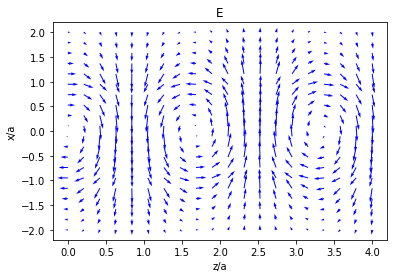

In [30]:
plt.figure(figsize = (200,200))
fig, ax = plt.subplots()
q = ax.quiver(mat_long_z/a, mat_long_x/a,(E_long_z).real,(E_long_x).real,color = "Blue")
plt.title('E')
plt.xlabel('z/a')
plt.ylabel('x/a')
plt.savefig('hegeneral.pdf')
plt.show()